In [1]:
# Imports
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
%matplotlib inline
from wrf import to_np
import metpy.calc as mpcalc
from metpy.units import units

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
# DBZ Color Table: 
dbz_contour_levels = np.arange(0.,80.,5.)
href_refl_colors = ("#ffffff", "#00ffff", "#0080ff", "#0000ff", "#00ff00", "#00c000", "#008000", "#ffff00",
                    "#ffc000", "#ff8000", "#ff0000", "#c00000", "#800000", "#ff00ff", "#8d67cd", "#c0c0c0")

def oldNorm(var1, var2):
    if (var1.max() >= var2.max()):
        norm_max = var1.max()
    else:
        norm_max = var2.max()
    if (var1.min() <= var2.min()):
        norm_min = var1.min()
    else:
        norm_min = var2.min()
    norm = plt.Normalize(norm_min, norm_max)
    
    return(norm)

def var_minmax(*arg):
    var_max = max(arg)
    var_min = min(arg)
    return(var_max, var_min)

def label_plot(ax, var, hres, vres, level):
    ax.set_title(f'{var} - {level} - {hres}/{vres} - ' + str(hour * 0.5) + ' hour(s) after initiation')
    ax.set_xlabel('West-East Distance (km)')
    ax.set_ylabel('South-North Distance (km)')
    ax.minorticks_on()
    ax.grid(which='major', color='gray', alpha=0.5, linestyle='dotted', linewidth=2.)
    
    return(ax)

# Define functions
def open_ds(bubble, wind, hres, vres):
    filepath = (f'/glade/scratch/sluthi/cm1_output/{bubble}_bubble/{wind}/{hres}dx_{vres}/cm1out_{hres}dx_{vres}.nc')
    return xr.open_dataset(filepath)

In [3]:
# Open datasets
cm1_1km50vlvls = open_ds('multi', 'multicell', '1km', '50vlvls')
cm1_1km100vlvls = open_ds('multi', 'multicell', '1km', '100vlvls')

In [4]:
# For loop to plot
for hour in range(0, 17, 1):
    
    # Get variable
    var1km50dz = cm1_1km50vlvls['th'][hour, 100:780, 100:580]
    var1km100dz = cm1_1km100vlvls['th'][hour, 100:780, 100:580]
    xh1km50dz = cm1_1km50vlvls['xh'][100:580]
    xh1km100dz = cm1_1km100vlvls['xh'][100:580]
    yh1km50dz = cm1_1km50vlvls['yh'][100:780]
    yh1km100dz = cm1_1km100vlvls['yh'][100:780]
    
    # Get variable min and max
    var_max, var_min = var_minmax(var1km50dz.max(), var1km100dz.max(), var1km50dz.min(), var1km100dz.min())
    
    # Create a normalize class
    norm = plt.Normalize(var_min, var_max)
    
    # Create figure and axes
    fig = plt.figure(figsize=(25,10))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    # Plot data for reflectivity
    #ax1.contourf(xh1km50dz, yh1km50dz, var1km50dz[hour], levels=dbz_contour_levels, colors=href_refl_colors)
    #ax2.contourf(xh1km100dz, yh1km100dz, var1km100dz[hour], levels=dbz_contour_levels, colors=href_refl_colors)
    
    # Plot data
    ax1.contour(xh1km50dz, yh1km50dz, var1km50dz, colors='black', linewidths=0.5)
    ax1.contourf(xh1km50dz, yh1km50dz, var1km50dz, cmap='coolwarm', norm=norm)
    ax2.contour(xh1km100dz, yh1km100dz, var1km100dz, colors='black', linewidths=0.5)
    ax2.contourf(xh1km100dz, yh1km100dz, var1km100dz, cmap='coolwarm', norm=norm)
    
    # Label plot
    label_plot(ax1, 'Cold Pool Parameter', '1kmdx', '50vlvls', 'N/A')
    label_plot(ax2, 'Cold Pool Parameter', '1kmdx', '100vlvls', 'N/A')
    
    # Create colorbar for figure using normalized colors
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=ax1).set_label('m/s', fontsize=16)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='coolwarm'), ax=ax2).set_label('m/s', fontsize=16)
    
    # Save figure
    #plt.savefig('/glade/scratch/sluthi/cm1_analysis/zoom_plots/cpc/mbmc_1km50_1km100_midzoom_' + str(hour * 0.5) + 'hr.png', dpi=1000, bbox_inches='tight', facecolor='white', transparent=False)

ValueError: numpy.nanmax raises on a.size==0 and axis=None; So Bottleneck too.

In [4]:
cm1_1km50vlvls

<xarray.Dataset>
Dimensions:   (one: 1, time: 17, xh: 900, xf: 901, yh: 900, yf: 901, zh: 50,
               zf: 51)
Coordinates:
  * time      (time) timedelta64[ns] 00:00:00 00:30:00 ... 07:30:00 08:00:00
  * xh        (xh) float32 0.5 1.5 2.5 3.5 4.5 ... 895.5 896.5 897.5 898.5 899.5
  * xf        (xf) float32 0.0 1.0 2.0 3.0 4.0 ... 896.0 897.0 898.0 899.0 900.0
  * yh        (yh) float32 0.5 1.5 2.5 3.5 4.5 ... 895.5 896.5 897.5 898.5 899.5
  * yf        (yf) float32 0.0 1.0 2.0 3.0 4.0 ... 896.0 897.0 898.0 899.0 900.0
  * zh        (zh) float32 0.05 0.15 0.25 0.35 0.45 ... 18.25 18.75 19.25 19.75
  * zf        (zf) float32 0.0 0.1 0.2 0.3 0.4 0.5 ... 18.0 18.5 19.0 19.5 20.0
Dimensions without coordinates: one
Data variables: (12/98)
    ztop      (one) float32 ...
    rain      (time, yh, xh) float32 ...
    prate     (time, yh, xh) float32 ...
    sws       (time, yh, xh) float32 ...
    svs       (time, yh, xh) float32 ...
    sps       (time, yh, xh) float32 ...
    ...        ...
    kmh       (time, zf, yh, xh) float32 ...
    khh       (time, zf, yh, xh) float32 ...
    exch_h    (time, zf, yh, xh) float32 ...
    exch_m    (time, zf, yh, xh) float32 ...
    tke_myj   (time, zf, yh, xh) float32 ...
    el_myj    (time, zf, yh, xh) float32 ...
Attributes: (12/71)
    CM1 version:    cm1r20.2
    Conventions:    CF-1.7
    missing_value:  -999999.9
    x_units:        km
    x_label:        x
    y_units:        km
    ...             ...
    cgt1:           1.875
    cgt2:           -1.25
    cgt3:           0.375
    dgt1:           2.0
    dgt2:           -3.0
    dgt3:           1.0

In [8]:
u10 = cm1_1km50vlvls['u10']
v10 = cm1_1km50vlvls['v10']

spd = mpcalc.wind_speed(u10, v10)
wdir = mpcalc.wind_direction(u10, v10)

/glade/scratch/sluthi/ipykernel_43740/481008373.py:40: UserWarning: No contour levels were found within the data range.
  ax1.contour(xh1km50dz, yh1km50dz, wspd1km50dz, colors='black', linewidths=0.5)
/glade/scratch/sluthi/ipykernel_43740/481008373.py:42: UserWarning: No contour levels were found within the data range.
  ax2.contour(xh1km100dz, yh1km100dz, wspd1km100dz, colors='black', linewidths=0.5)


ValueError: Argument U has a size 1156 which does not match 680, the number of arrow positions

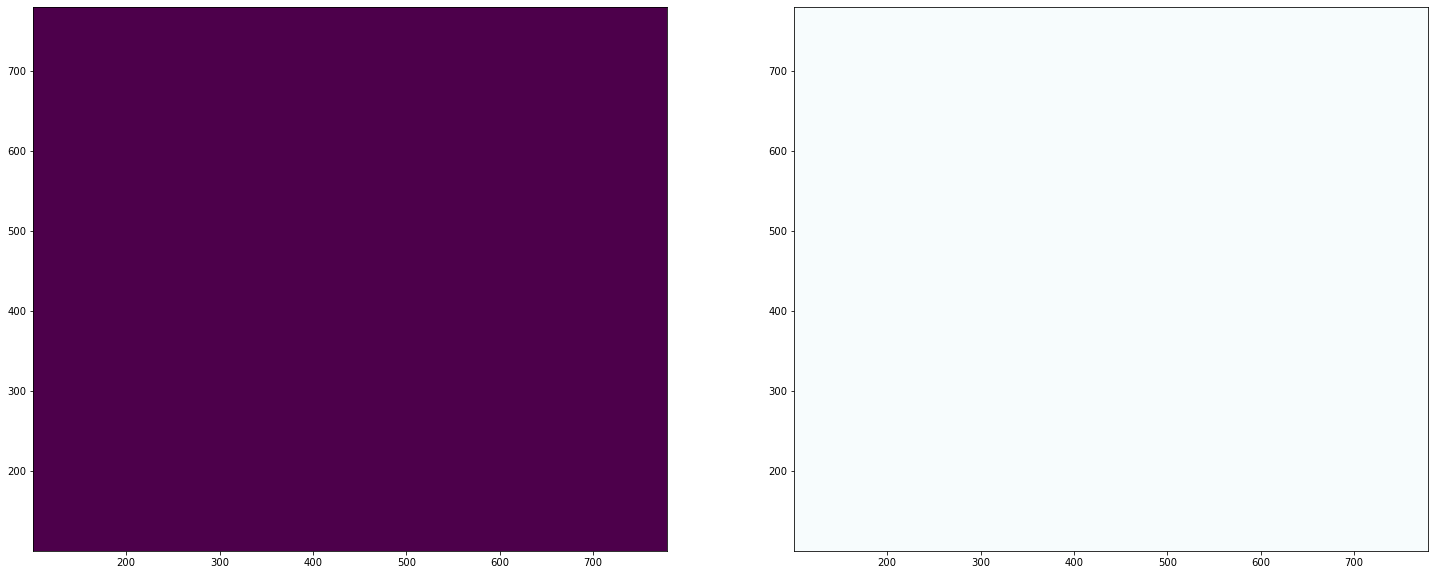

In [6]:
# For loop to plot
for hour in range(0, 11, 1):
    
    # Get variable
    u101km50dz = cm1_1km50vlvls['u10'][hour, 100:780, 100:780]
    v101km50dz = cm1_1km50vlvls['v10'][hour, 100:780, 100:780]
    u101km100dz = cm1_1km100vlvls['u10'][hour, 100:780, 100:780]
    v101km100dz = cm1_1km100vlvls['v10'][hour, 100:780, 100:780]
    xh1km50dz = cm1_1km50vlvls['xh'][100:780]
    xh1km100dz = cm1_1km100vlvls['xh'][100:780]
    yh1km50dz = cm1_1km50vlvls['yh'][100:780]
    yh1km100dz = cm1_1km100vlvls['yh'][100:780]
    
    # Calculate wind speed and direction
    wspd1km50dz = mpcalc.wind_speed(u101km50dz, v101km50dz)
    wdir1km50dz = mpcalc.wind_direction(u101km50dz, v101km50dz)
    wspd1km100dz = mpcalc.wind_speed(u101km100dz, v101km100dz)
    wdir1km100dz = mpcalc.wind_direction(u101km100dz, v101km100dz)
    
    # Normalize u and v for quiver plot
    u_norm1km50dz = u101km50dz / np.sqrt(u101km50dz**2 + v101km50dz**2)
    v_norm1km50dz = v101km50dz / np.sqrt(v101km50dz**2 + v101km50dz**2)
    u_norm1km100dz = u101km100dz / np.sqrt(u101km100dz**2 + v101km100dz**2)
    v_norm1km100dz = v101km100dz / np.sqrt(v101km100dz**2 + v101km100dz**2)
    
    # Get variable min and max
    var_max, var_min = var_minmax(wspd1km50dz.max(), wspd1km100dz.max(), wspd1km50dz.min(), wspd1km100dz.min())
    var_max = var_max.values
    var_min = var_min.values
    
    # Create a normalize class
    norm = plt.Normalize(var_min, var_max)
    
    # Create figure and axes
    fig = plt.figure(figsize=(25,10))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    # Plot data
    ax1.contour(xh1km50dz, yh1km50dz, wspd1km50dz, colors='black', linewidths=0.5)
    ax1.contourf(xh1km50dz, yh1km50dz, wspd1km50dz, cmap='BuPu', norm=norm)
    ax2.contour(xh1km100dz, yh1km100dz, wspd1km100dz, colors='black', linewidths=0.5)
    ax2.contourf(xh1km100dz, yh1km100dz, wspd1km100dz, cmap='BuPu', norm=norm)
    ax1.quiver(xh1km50dz, yh1km50dz, u_norm1km50dz[::20, ::20], v_norm1km50dz[::20, ::20], pivot='middle', scale=25, width=0.005)
    
    # Label plot
    label_plot(ax1, 'Wind Speed', '1kmdx', '50vlvls', '10-m')
    label_plot(ax2, 'Wind Speed', '1kmdx', '100vlvls', '10-m')
    
    # Create colorbar for figure using normalized colors
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='BuPu'), ax=ax1).set_label('m/s', fontsize=16)
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap='BuPu'), ax=ax2).set_label('m/s', fontsize=16)
    
    # Save figure
    #plt.savefig('/glade/scratch/sluthi/cm1_analysis/zoom_plots/wspd_10m/mbmc_1km50_1km100_midzoom_' + str(hour * 0.5) + 'hr.png', dpi=1000, bbox_inches='tight', facecolor='white', transparent=False)